<a href="https://colab.research.google.com/github/trojasm/MetNumUN2023I/blob/main/Lab10/trojasAlgorithmicToolboxWeek3SolvingNonLinearAlgebraicEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [2]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    cur = x0 - f(x0)/fder(x0)
    prev = x0
    
    for _ in range(maxiter):
        if(abs(cur-prev)<=eps):
            break
        prev = cur
        cur = cur - f(cur)/fder(cur)
    
    return cur

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [3]:
import numpy as np
from numpy.testing import assert_allclose

In [4]:
f = lambda x: (x-1)*(x+1)
fd = lambda x: 2*x

rndm = np.random.RandomState(1234)
a = rndm.uniform(0, 10, size = (2,10))

for x0 in a[0]:
    assert_allclose(1, newton_iteration(f, fd, x0))

for x0 in a[1]:
    assert_allclose(-1, newton_iteration(f, fd, -x0))

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [5]:
def modified_newton(f, fder, x0, m=1, eps=1e-5, maxiter=1000):
    cur = x0 - m*f(x0)/fder(x0)
    prev = x0
    
    for _ in range(maxiter):
        if(abs(cur-prev)<=eps):
            break
        prev = cur
        cur = cur - m*f(cur)/fder(cur)
    
    return cur

In [6]:
def calc_iter(f, fder, x0, m=1, eps=1e-5, maxiter=2**20):
    
    cur = x0 - m*f(x0)/fder(x0)
    prev = x0
    num = 1
    
    while abs(cur-prev)>eps and num<maxiter:
        prev = cur
        cur = cur - m*f(cur)/fder(cur)
        num+=1
    if num != maxiter:
        return num
    else:
        return "not converges"

In [7]:
f = lambda x: (x-1)**2*(x+1)**2
fd = lambda x: 4*(x-1)*(x+1)*x

rndm = np.random.RandomState(1234)
a = rndm.uniform(0, 10, size = (2,10))

for x0 in a[0]:
    assert_allclose(1, modified_newton(f, fd, x0, 2))

for x0 in a[1]:
    assert_allclose(-1, modified_newton(f, fd, -x0, 2))

In [8]:
for m in range(1,6):
    print(m, calc_iter(f, fd, a[1][1],m))

1 22
2 6
3 18
4 not converges
5 341159


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

<ipython-input-9-96ada0ad215e>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([1, 2], labels=["sqrt", "cos"])


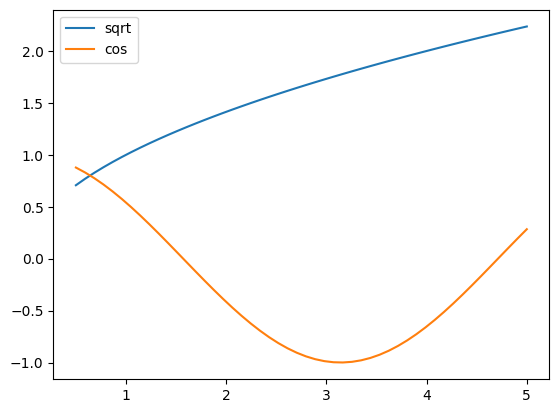

In [9]:
import matplotlib.pyplot as plt
x = np.linspace(0.5, 5, 50)

plt.plot(x, np.sqrt(x))
plt.plot(x, np.cos(x))
plt.legend([1, 2], labels=["sqrt", "cos"])

plt.show()

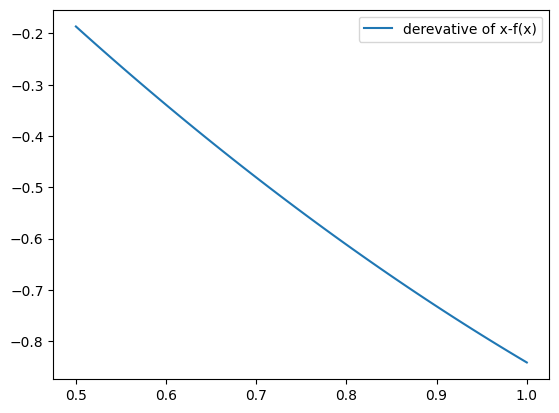

In [10]:
plt.plot(np.linspace(0.5, 1, 50), 1 - (np.sqrt(np.linspace(0.5, 1, 50)) + np.sin(np.linspace(0.5, 1, 50))))
plt.legend(labels=["derevative of x-f(x)"])
plt.show()

clearly seen that root is inside [0.5, 1] interval

declare $f(x)$ as $\sqrt x - \cos(x)$,  then $f'(x) = \frac{1}{2\sqrt{x}} + \sin{x}$

m and M is 1 and 2

### Firstly, solving fixed point problem

In [11]:
def f_p_sol(eps = 1e-5, alpha = 1):
    
    prev = 1.5/2
    cur = prev - alpha*(np.sqrt(prev) - np.cos(prev))
    eps1 = abs(cur - prev)*10
    num = 1
    
    while abs(cur - prev)>0.25*eps and cur>0:
        prev = cur
        cur = cur - alpha*(np.sqrt(cur) - np.cos(cur))
        num+=1
        
    return cur, num

In [12]:
for i in [0.1, 0.5, 1.0, 2.0]:
    print(i, f_p_sol(alpha = i))

0.1 (0.6417314556204897, 67)
0.5 (0.6417156095558334, 12)
1.0 (0.6417142154160496, 9)
2.0 (-0.11760568315221742, 5)


In [13]:
f_p_sol(alpha = 2.0/3)

(0.6417145071423276, 8)

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [14]:
import cmath

def newt_frac(x0):
    
    eps=1e-5
    maxiter=1000
    cur = x0 - (x0**3-1)/3*x0**2
    prev = x0
    
    for _ in range(maxiter):
        if(abs(cur-prev)<=eps):
            break
        if(abs(cur-prev)>1e2):
            return 0
        prev = cur
        cur = cur - (cur**3-1)/3*cur**2
        
    if abs(cur-cmath.exp(complex(0,2*np.pi*1/3)))<abs(cur-cmath.exp(complex(0,2*np.pi*2/3))):
        return 1
    else :
        return 2

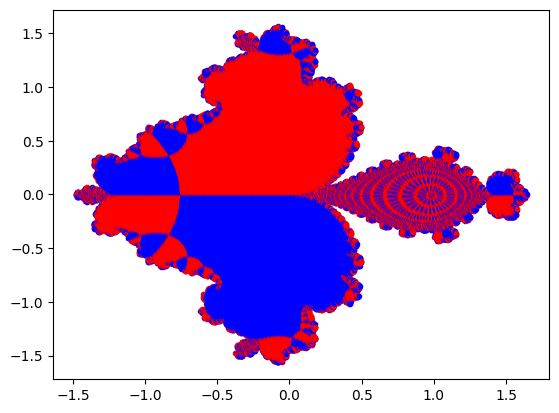

In [15]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

for x0 in x:
    for y0 in y:
        fr = newt_frac(complex(x0,y0))
        if fr==1:
            plt.plot(x0, y0, marker='o', markersize=3, color='red')
        elif fr==2:
            plt.plot(x0, y0, marker='o', markersize=3, color='blue')
        
roots_x = []
roots_y = []
for i in range(3):
    z = cmath.exp(complex(0,2*np.pi*i/3))
    roots_x.append(z.real)
    roots_y.append(z.imag)

plt.scatter(roots_x, roots_y, c='g')
plt.show()